#  Lab 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement


# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 100


# Look pretty...
matplotlib.style.use('ggplot')


# Load up the scanned armadillo
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

In [50]:
def do_PCA(armadillo):
  #
  # TODO: Write code to import the libraries required for PCA.
  # Then, train your PCA on the armadillo dataframe. Finally,
  # drop one dimension (reduce it down to 2D) and project the
  # armadillo down to the 2D principal component feature space.
  #
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and
  # not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)
  #
  # .. your code here ..
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)
  pca.fit(armadillo)
  T=pca.transform(armadillo)
#   print(armadillo.shape)
#   print(T.shape)
  pcb=pd.DataFrame(data=T, dtype='float64')
  return pcb
pcc=do_PCA(armadillo)
print(pcc.dtypes)

0    float64
1    float64
dtype: object


In [53]:
def do_RandomizedPCA(armadillo):
  #
  # TODO: Write code to import the libraries required for
  # RandomizedPCA. Then, train your RandomizedPCA on the armadillo
  # dataframe. Finally, drop one dimension (reduce it down to 2D)
  # and project the armadillo down to the 2D principal component
  # feature space.
  #
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and
  # not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)
  #
  # .. your code here ..
  import numpy
  from sklearn.decomposition import RandomizedPCA
  pca = RandomizedPCA(n_components=2)
  pca.fit(armadillo)
  T=pca.transform(armadillo)
#   print(armadillo.shape)
#   print(T.shape)
#   print('what?')
  pcb = pd.DataFrame(T, dtype='float64')
  return pcb

# do_RandomizedPCA(armadillo)

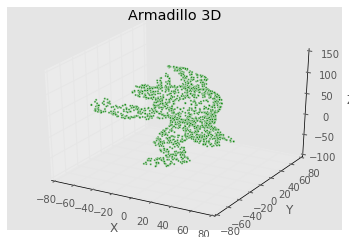

In [25]:
# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)
plt.show()

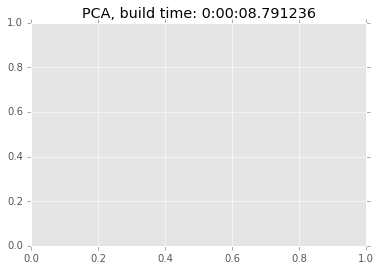

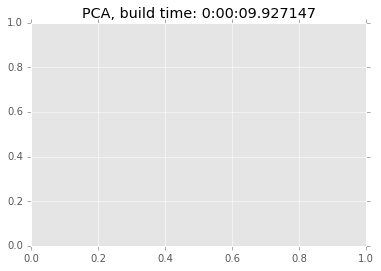

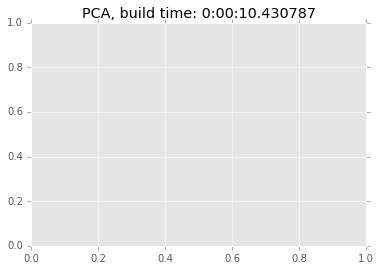

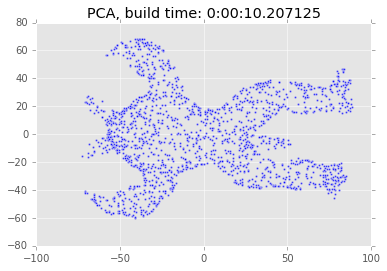

In [51]:
# Time the execution of PCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed PCA armadillo!
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca.loc[:,0], pca.loc[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

In [55]:
# Time the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solv

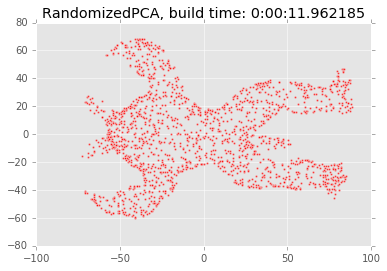

In [56]:
# Render the newly transformed RandomizedPCA armadillo!
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca.loc[:,0], rpca.loc[:,1], c='red', marker='.', alpha=0.75)

plt.show()

# Lab 2

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

# Look pretty...
matplotlib.style.use('ggplot')


# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [101]:
# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# .. your code here ..
df = pd.read_csv('Datasets/kidney_disease.csv')
df = df.dropna(axis=0, thresh=(len(df.columns)))
print(df.describe())
print(df.head(5))

               id         age          bp          sg          al          su  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean   274.841772   49.563291   74.050633    1.019873    0.797468    0.253165   
std    102.998517   15.512244   11.175381    0.005499    1.413130    0.813397   
min      3.000000    6.000000   50.000000    1.005000    0.000000    0.000000   
25%    243.000000   39.250000   60.000000    1.020000    0.000000    0.000000   
50%    298.500000   50.500000   80.000000    1.020000    0.000000    0.000000   
75%    355.750000   60.000000   80.000000    1.025000    1.000000    0.000000   
max    399.000000   83.000000  110.000000    1.025000    4.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000  
mean   131.341772   52.575949    2.188608  138.848101    4.636709   13.687342  
std     64.939832   47.395382 

In [102]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]


# TODO: Use an indexer to select only the following columns:
#       ['bgr','wc','rc']
#
# .. your code here ..
df1=df.loc[:,['bgr','wc','rc']]


# TODO: Print out and check your dataframe's dtypes. You'll probably
# want to call 'exit()' after you print it out so you can stop the
# program's execution.
#
# You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.
# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
#
# .. your code here ..
print(df1.describe())
print('\n')
print(df1.dtypes)
print('\n')
print(df1.head(5))
print('\n')

df1['wc'] = pd.to_numeric(df1['wc'], errors='coerce')
df1['rc'] = pd.to_numeric(df1['rc'], errors='coerce')

print(df1.describe())
print('\n')
print(df1.dtypes)
print('\n')
print(df1.head(5))
print('\n')

              bgr
count  158.000000
mean   131.341772
std     64.939832
min     70.000000
25%     97.000000
50%    115.500000
75%    131.750000
max    490.000000


bgr    float64
wc      object
rc      object
dtype: object


      bgr     wc   rc
3   117.0   6700  3.9
9    70.0  12100  3.7
11  380.0   4500  3.8
14  157.0  11000  2.6
20  173.0   9200  3.2


              bgr            wc          rc
count  158.000000    158.000000  158.000000
mean   131.341772   8475.949367    4.891772
std     64.939832   3126.880181    1.019364
min     70.000000   3800.000000    2.100000
25%     97.000000   6525.000000    4.500000
50%    115.500000   7800.000000    4.950000
75%    131.750000   9775.000000    5.600000
max    490.000000  26400.000000    8.000000


bgr    float64
wc       int64
rc     float64
dtype: object


      bgr     wc   rc
3   117.0   6700  3.9
9    70.0  12100  3.7
11  380.0   4500  3.8
14  157.0  11000  2.6
20  173.0   9200  3.2




In [96]:
# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
#
# .. your code here ..



# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df1 = helper.scaleFeatures(df1)
df1 = df1.reset_index()
print(df1.head(5))

New Variances:
bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64
New Describe:
                bgr            wc            rc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -4.497106e-17 -4.497106e-17  1.349132e-16
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -1.500159e+00 -2.747446e+00
25%   -5.305059e-01 -6.259123e-01 -3.855519e-01
50%   -2.447210e-01 -2.168611e-01  5.730335e-02
75%    6.306235e-03  4.167672e-01  6.969831e-01
max    5.540492e+00  5.750474e+00  3.058878e+00
   index       bgr        wc        rc
0      0 -0.221549 -0.569768 -0.976025
1      1 -0.947597  1.162684 -1.172850
2      2  3.841231 -1.275582 -1.074438
3      3  0.396364  0.809777 -2.255385
4      4  0.643529  0.232293 -1.664911


In [97]:
# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df1)
T=pca.transform(df1)
#   print(armadillo.shape)
#   print(T.shape)
pcb=pd.DataFrame(data=T, dtype='float64')

Features by importance:
[(78.49399082805256, 'index'), (3.744200112620511, 'wc'), (2.7655789686188106, 'bgr'), (2.1905716736049023, 'rc')]


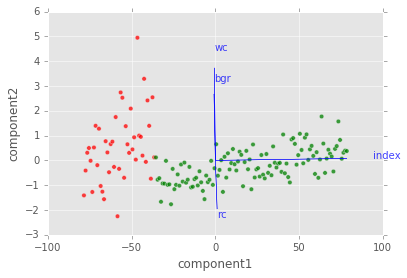

In [99]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
ax = helper.drawVectors(T, pca.components_, df1.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

# Lab 3

In [108]:
## Get rid of the nominal features

nominalFeatures = ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

dfNum = df.drop(nominalFeatures, axis=1)
dfNum = dfNum.convert_objects(convert_numeric=True)

print(dfNum.describe())
print('\n')
print(dfNum.head(5))
print('\n')
print(dfNum.dtypes)

              age          bp          sg          al          su         bgr  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    49.563291   74.050633    1.019873    0.797468    0.253165  131.341772   
std     15.512244   11.175381    0.005499    1.413130    0.813397   64.939832   
min      6.000000   50.000000    1.005000    0.000000    0.000000   70.000000   
25%     39.250000   60.000000    1.020000    0.000000    0.000000   97.000000   
50%     50.500000   80.000000    1.020000    0.000000    0.000000  115.500000   
75%     60.000000   80.000000    1.025000    1.000000    0.000000  131.750000   
max     83.000000  110.000000    1.025000    4.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    52.575949    2.188608  138.848101    4.636709   13.687342   41.917722   
std     47.395382    3.0776

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
